In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Carregando os Dados

Primeiro, carregamos os dados de um arquivo Excel (`.xls`). Vamos usar a biblioteca `pandas` para ler o arquivo e imprimir seu conteúdo.


In [33]:
# Carregar o arquivo XLS com os dados
file_path = 'Tabela_Perceptron.xls'
data_xls = pd.read_excel(file_path)

# Exibir os dados para verificação
print(data_xls.to_string())

# Separar os dados em features (X) e labels (y)
X = data_xls[['x1', 'x2', 'x3']].values
y = data_xls['d'].values

        x1      x2       x3  d
0  -0.6508  0.1097   4.0009 -1
1  -1.4492  0.8896   4.4005 -1
2   2.0850  0.6876  12.0710 -1
3   0.2626  1.1476   7.7985  1
4   0.6418  1.0234   7.0427  1
5   0.2569  0.6730   8.3265 -1
6   1.1155  0.6043   7.4446  1
7   0.0914  0.3399   7.0677 -1
8   0.0121  0.5256   4.6316  1
9  -0.0429  0.4660   5.4323  1
10  0.4340  0.6870   8.2287 -1
11  0.2735  1.0287   7.1934  1
12  0.4839  0.4851   7.4850 -1
13  0.4089 -0.1267   5.5019 -1
14  1.4391  0.1614   8.5843 -1
15 -0.9115 -0.1973   2.1962 -1
16  0.3654  1.0475   7.4858  1
17  0.2144  0.7515   7.1699  1
18  0.2013  1.0014   6.5489  1
19  0.6483  0.2183   5.8991  1
20 -0.1147  0.2242   7.2435 -1
21 -0.7970  0.8795   3.8762  1
22 -1.0625  0.6366   2.4707  1
23  0.5307  0.1285   5.6883  1
24 -1.2200  0.7777   1.7252  1
25  0.3957  0.1076   5.6623 -1
26 -0.1013  0.5989   7.1812 -1
27  2.4482  0.9455  11.2095  1
28  2.0149  0.6192  10.9263 -1
29  0.2012  0.2611   5.4631  1


# Dividindo os Dados em Treino e Teste

Dividimos o dataset em conjuntos de treino e teste. Usamos `train_test_split` do `scikit-learn` para isso.


In [34]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Padronizando os Dados

Padronizamos os dados de treino e teste para garantir que todos tenham a mesma escala. Usamos `StandardScaler` para isso.


In [35]:
# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Criando o Perceptron

Criamos um modelo Perceptron usando a API `Sequential` do Keras. O modelo terá uma única camada densa com ativação `tanh` e usaremos a função de perda `hinge`.


In [36]:
def create_perceptron():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],), activation='tanh') # Use tanh for sign activation
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='hinge', metrics=['accuracy'])
    return model


In [37]:
# Inicializar a tabela para armazenar os resultados
results_list = []
weights = []  # Lista para armazenar os pesos finais dos modelos
histories = [] # Inicialize uma lista para armazenar os históricos


# Treinando o Modelo

Treinamos o modelo várias vezes com diferentes inicializações de pesos e armazenamos os pesos e a acurácia de cada treino.


In [38]:
# Realizar cinco treinamentos
for i in range(5):
    np.random.seed(i)  # Reiniciar o gerador de números aleatórios
    tf.random.set_seed(i)

    model = create_perceptron()
    
    # Armazenar pesos iniciais
    initial_weights = model.get_weights()
    
    # Treinamento
    history = model.fit(X_train, y_train, epochs=100, verbose=0)

    histories.append(history)
    
    # Armazenar pesos finais
    final_weights = model.get_weights()
    weights.append(final_weights)  # Adicionar pesos finais à lista
    
    # Avaliar o modelo
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred >= 0, 1, -1)  # Converter previsões para -1 e 1
    accuracy = accuracy_score(y_test, y_pred)
    
    # Adicionar os resultados à lista
    results_list.append({
        'Treinamento': i + 1,
        'Peso Inicial w0': initial_weights[0][0][0],
        'Peso Inicial w1': initial_weights[0][1][0],
        'Peso Inicial w2': initial_weights[0][2][0],
        'Peso Final w0': final_weights[0][0][0],
        'Peso Final w1': final_weights[0][1][0],
        'Peso Final w2': final_weights[0][2][0],
        'Número de Épocas': len(history.history['loss']),
    })
    
    print(f"Treinamento {i+1}: Acurácia: {accuracy * 100:.2f}%")

Treinamento 1: Acurácia: 50.00%
Treinamento 2: Acurácia: 33.33%
Treinamento 3: Acurácia: 50.00%
Treinamento 4: Acurácia: 50.00%
Treinamento 5: Acurácia: 83.33%


In [39]:
# Converter a lista para DataFrame
results_df = pd.DataFrame(results_list)

# Exibir a tabela com os resultados
print(results_df)


   Treinamento  Peso Inicial w0  Peso Inicial w1  Peso Inicial w2  \
0            1        -0.509555        -0.718763         0.086689   
1            2        -0.820259         0.983424         0.320820   
2            3        -0.864909        -0.087553        -0.673855   
3            4        -0.897338         0.166205        -0.008986   
4            5         1.165145         0.137675        -1.035275   

   Peso Final w0  Peso Final w1  Peso Final w2  Número de Épocas  
0      -0.604331      -0.465416      -0.159176               100  
1      -0.861799       1.118963       0.148875               100  
2      -0.803823       0.311925      -0.699789               100  
3      -0.847658       0.543766      -0.077111               100  
4       0.986730       0.577222      -1.291257               100  


# Avaliando o Modelo

Avaliaremos a acurácia do modelo treinado.


In [40]:
# Avaliar o modelo final
model.set_weights(weights[-1])  # Usar os pesos do último treinamento
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0, 1, -1)  # Converter previsões para -1 e 1
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo final: {accuracy * 100:.2f}%")


Acurácia do modelo final: 83.33%


# Plotando a Função de Perda e Acurácia

Plotamos a função de perda e a acurácia ao longo das épocas de treinamento.


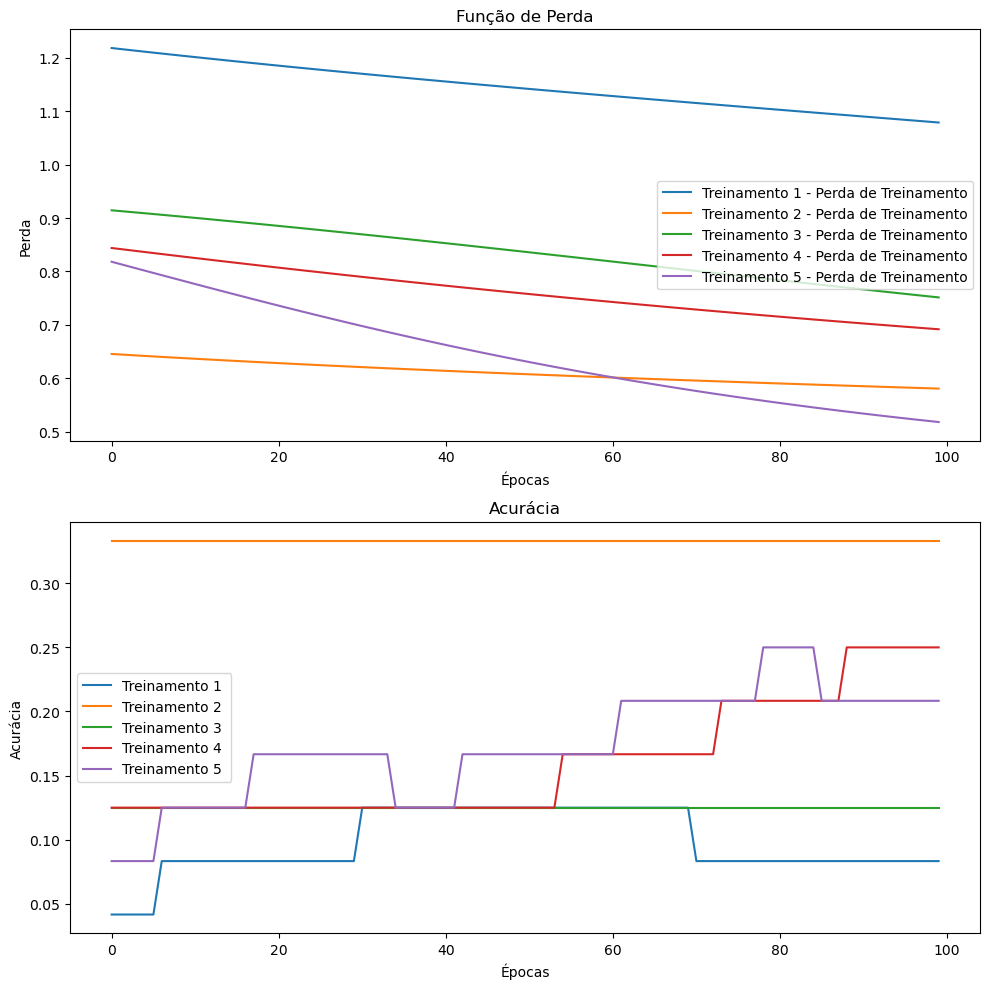

In [43]:
# Plotar a função de perda e a acurácia
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotar a função de perda
for i, history in enumerate(histories):
    axs[0].plot(history.history['loss'], label=f'Treinamento {i+1} - Perda de Treinamento')
    if 'val_loss' in history.history:
        axs[0].plot(history.history['val_loss'], label=f'Treinamento {i+1} - Perda de Validação')
axs[0].set_title('Função de Perda')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Perda')
axs[0].legend()

# Plotar a acurácia
for i, history in enumerate(histories):
    axs[1].plot(history.history['accuracy'], label=f'Treinamento {i+1} ')
    if 'val_accuracy' in history.history:
        axs[1].plot(history.history['val_accuracy'], label=f'Treinamento {i+1} - Acurácia de Validação')
axs[1].set_title('Acurácia')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Acurácia')
axs[1].legend()

plt.tight_layout()
plt.show()

# Salvando e Carregando o Modelo

Finalmente, salvamos o modelo treinado e, em seguida, mostramos como carregá-lo.


In [42]:
# Salvar os pesos e o modelo
model.save('perceptron_model.h5')
